In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

#Import API key
from config import api_key

#Import citipy
from citipy import citipy

#Output File (CSV)
output_file = "final_output/cities.csv"

#Ranges for latitudes and Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

#print(api_key)

In [2]:
#Lists for lat and longs and cities
lat_longs = []
cities = []

#Create random lat and Long value combinations
lats = np.random.uniform(lat_range[0], long_range[1], size= 2500)
longs = np.random.uniform(long_range[0], long_range[1], size= 2500)
lat_longs = zip(lats, longs)

#Identify nearest city for each combination and check if its unique
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    #If city is not already in the list then add it
    if city not in cities:
        cities.append(city)

        
#Creating smaller list of cities to test API with
#mini_cities = []
#mini_cities = cities[0:10]

#Print total city count
#print(len(cities))
#print(mini_cities)
#print(cities[0:10])

In [3]:
#Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"


#Set units variable to return temperature in Farenheiht 
units = "imperial"

#Create lists to hold retrived data that matches cities index
latitude_cities = []
longitude_cities = []
temperatures_cities = []
humidity_cities = []
cloudiness_cities = []
wind_speed_cities = []
max_temperatures = []

final_cities = []
print("Beginning Data Retrieval")
print("--------------------------")
    

#Use cities list to loop through and search web
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
        weather_response_json = requests.get(query_url).json()
        latitude_cities.append(weather_response_json['coord']['lat'])
        longitude_cities.append(weather_response_json['coord']['lon'])
        temperatures_cities.append(weather_response_json['main']['temp'])
        humidity_cities.append(weather_response_json['main']['humidity'])
        cloudiness_cities.append(weather_response_json['clouds']['all'])
        wind_speed_cities.append(weather_response_json['wind']['speed'])
        max_temperatures.append(weather_response_json['main']['temp_max'])
        final_cities.append(city)
        print(f"Processing Record |{city}")
    except KeyError:
        print("City not found. Skipping...")
        

    


    
#print(latitude_cities)
#print(temperatures_cities)
#print(humidity_cities)
#print(cloudiness_cities)
#print(wind_speed_cities)


Beginning Data Retrieval
--------------------------
City not found. Skipping...
Processing Record |linhares
Processing Record |padang
Processing Record |vaini
Processing Record |puerto escondido
Processing Record |chokurdakh
Processing Record |cumberland
Processing Record |jamestown
City not found. Skipping...
Processing Record |kapaa
Processing Record |provideniya
Processing Record |busselton
Processing Record |ponta delgada
City not found. Skipping...
Processing Record |isangel
Processing Record |north bend
Processing Record |aripuana
Processing Record |katsuura
Processing Record |ushuaia
Processing Record |atuona
Processing Record |albany
Processing Record |rikitea
Processing Record |qaanaaq
Processing Record |guerrero negro
City not found. Skipping...
Processing Record |zalantun
Processing Record |sibu
Processing Record |kumluca
Processing Record |yerbogachen
Processing Record |hobart
Processing Record |hovd
Processing Record |port alfred
Processing Record |barrow
City not found. S

Processing Record |cabedelo
Processing Record |lahat
Processing Record |brooks
Processing Record |geraldton
Processing Record |quzhou
Processing Record |uralets
Processing Record |naze
Processing Record |saint george
Processing Record |srivardhan
Processing Record |bardiyah
Processing Record |kirakira
Processing Record |culasian
Processing Record |naryan-mar
City not found. Skipping...
Processing Record |burnie
Processing Record |banda aceh
Processing Record |chanute
Processing Record |keetmanshoop
Processing Record |victoria
Processing Record |bloemfontein
Processing Record |borovskoy
Processing Record |tuyen quang
Processing Record |powell
Processing Record |amapala
Processing Record |muzhi
Processing Record |grand gaube
Processing Record |cristobal obregon
Processing Record |gambela
Processing Record |iglesias
Processing Record |kushikino
Processing Record |jacareacanga
Processing Record |coahuayana
Processing Record |kavaratti
Processing Record |kirkenaer
Processing Record |boende


Processing Record |tahta
Processing Record |kashan
Processing Record |shingu
Processing Record |chapais
Processing Record |tazovskiy
Processing Record |argentan
Processing Record |ola
Processing Record |roald
Processing Record |vila franca do campo
City not found. Skipping...
Processing Record |berdigestyakh
City not found. Skipping...
Processing Record |shimoda
Processing Record |kampot
Processing Record |marsa matruh
Processing Record |ouro preto do oeste
Processing Record |vysokogornyy
Processing Record |villarrobledo
Processing Record |san rafael
Processing Record |bilma
City not found. Skipping...
Processing Record |haslett
Processing Record |moron
Processing Record |japura
Processing Record |salto
Processing Record |olafsvik
Processing Record |santo antonio do amparo
Processing Record |heinola
Processing Record |narrabri
Processing Record |mount gambier
Processing Record |zadar
Processing Record |akureyri
Processing Record |flinders
Processing Record |oak ridge
Processing Record 

In [4]:
#Create DataFrame with retrieved data

#Creating Dictionary form lists

weather_dict = {'City':final_cities, 'Latitude': latitude_cities, 'Longitude': longitude_cities, 'Temp.(F)': temperatures_cities,
               'Humidity (%)': humidity_cities, 'Cloudiness(%)': cloudiness_cities, 'Wind Speed(mph)': wind_speed_cities,
               'Max Temp': max_temperatures}

weather_dict
#convert dictionary to dataframe 
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("weather_output.csv")
weather_df

,City,Latitude,Longitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
0,linhares,-19.39,-40.07,66.04,94,65,1.10,66.04
1,padang,-0.95,100.35,87.55,55,84,4.99,87.55
2,vaini,-21.20,-175.20,77.00,73,20,9.17,77.00
3,puerto escondido,15.85,-97.07,81.93,74,99,3.76,81.93
4,chokurdakh,70.63,147.92,47.01,55,97,7.11,47.01
...,...,...,...,...,...,...,...,...
615,la sarre,48.80,-79.20,66.22,94,68,8.97,66.22
616,corrales,35.24,-106.61,81.55,15,1,4.38,84.99
617,luderitz,-26.65,15.16,51.80,81,0,12.75,51.80
618,tubuala,9.52,-79.03,80.08,88,20,5.82,80.60


In [5]:
#Locate Rows where Humidity is greater than 100 and drop them
humidity_sort = weather_df.loc[weather_df['Humidity (%)'] > 100]
#humidity_sort

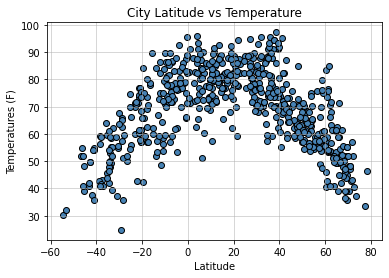

In [7]:
#Temperature vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Temp.(F)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = 'black')

#Set graph title
plt.title('City Latitude vs Temperature')

#Set x axis label
plt.xlabel('Latitude')

#Set y axis label
plt.ylabel('Temperatures (F)')

#Set lines on grid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save graph as .pngs
plt.savefig('City_vs_Temp.png')
plt.show()


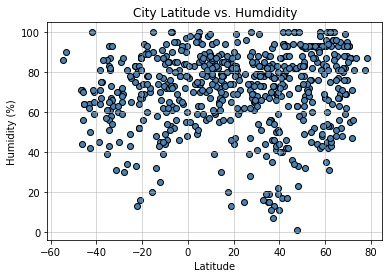

In [9]:
#Humidity vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Humidity (%)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Humdidity")

#Set x axis
plt.xlabel('Latitude')

#set y axis
plt.ylabel('Humidity (%)')

#set grid lines
plt.grid(linestyle = '-', linewidth =1, alpha = 0.5)

#Save graph as .pngs
plt.savefig('City_vs_Humdidity.png')
plt.show()

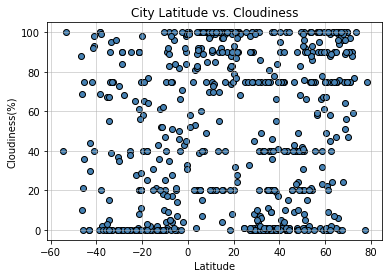

In [11]:
#Cloudiness vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness(%)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Cloudiness")

#Set x axis
plt.xlabel('Latitude')

#Set y axis
plt.ylabel('Cloudiness(%)')

#Set grid line
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save graph as .pngs
plt.savefig('City_vs_Cloudiness.png')
plt.show()

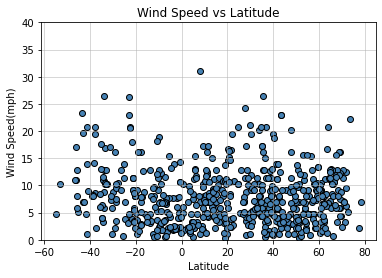

In [13]:
#Wind Speed vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed(mph)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set x axis
plt.xlabel('Latitude')

#Set y axis
plt.ylabel('Wind Speed(mph)')

#Set title
plt.title("Wind Speed vs Latitude")

#Set y axis limit
plt.ylim(0,40)

#Set grid lines
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save graph as .pngs
plt.savefig('Wind Speed vs Latitude.png')
plt.show()

In [14]:
#Split Dataframe into North Hemisphere and South Hemisphere
northern_hemisphere = weather_df.loc[weather_df['Latitude'] > 0]
northern_hemisphere

,City,Latitude,Longitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
3,puerto escondido,15.85,-97.07,81.93,74,99,3.76,81.93
4,chokurdakh,70.63,147.92,47.01,55,97,7.11,47.01
5,cumberland,35.05,-78.87,73.96,88,75,5.50,75.20
6,jamestown,42.10,-79.24,70.95,83,1,5.61,72.00
7,kapaa,22.08,-159.32,77.43,78,90,19.46,78.80
...,...,...,...,...,...,...,...,...
614,sayyan,15.17,44.32,65.34,56,97,3.58,65.34
615,la sarre,48.80,-79.20,66.22,94,68,8.97,66.22
616,corrales,35.24,-106.61,81.55,15,1,4.38,84.99
618,tubuala,9.52,-79.03,80.08,88,20,5.82,80.60


In [15]:
#Define Function for calculating correlation coeff. and creating graph
def correlation_graph(x,y):
    print(f"The r-squared value is: {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq,(0,25),fontsize=15, color='red')
    plt.show()
    return line_eq
    



The r-squared value is: -0.72


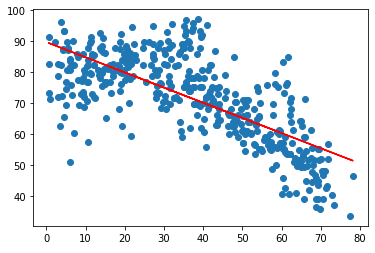

'y = -0.49x + 89.7'

In [16]:
#Linear Regression for Northern Hemisphere DataFrame (Latitude vs Max Temp)
north_temperatures = correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Max Temp'])
north_temperatures


In [17]:
#Split Dataframe into North Hemisphere and South Hemisphere
southern_hemisphere = weather_df.loc[weather_df['Latitude'] < 0]
southern_hemisphere

,City,Latitude,Longitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
0,linhares,-19.39,-40.07,66.04,94,65,1.10,66.04
1,padang,-0.95,100.35,87.55,55,84,4.99,87.55
2,vaini,-21.20,-175.20,77.00,73,20,9.17,77.00
9,busselton,-33.65,115.33,58.62,58,39,16.89,63.00
11,isangel,-19.55,169.27,84.20,74,40,9.17,84.20
...,...,...,...,...,...,...,...,...
603,necochea,-38.55,-58.74,41.00,81,69,8.01,41.00
604,miguel calmon,-11.43,-40.59,64.40,91,52,5.95,64.40
609,porecatu,-22.76,-51.38,71.60,33,0,4.70,71.60
610,nueve de julio,-35.44,-60.88,44.01,39,3,5.99,44.01


The r-squared value is: 0.75


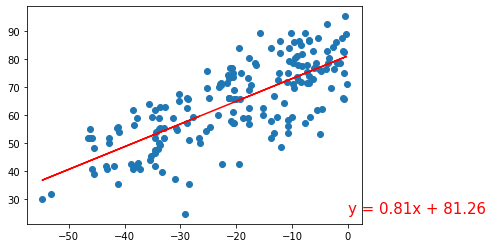

'y = 0.81x + 81.26'

In [18]:
#Linear Regression for Southern Hemisphere DataFrame (Latitude vs Max Temp)
south_temperatures = correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Max Temp'])
south_temperatures

The r-squared value is: 0.0


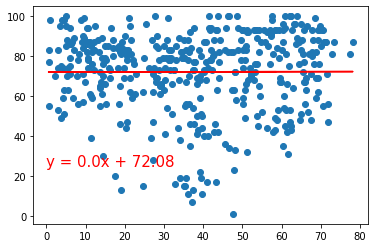

'y = 0.0x + 72.08'

In [19]:
#Latitude vs Humidity

#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Humidity (%)'])
north_humidity


The r-squared value is: 0.13


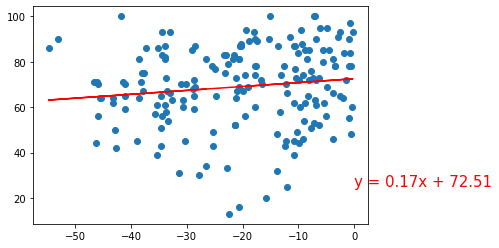

'y = 0.17x + 72.51'

In [20]:
#south
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Humidity (%)'])
south_humidity

The r-squared value is: -0.09


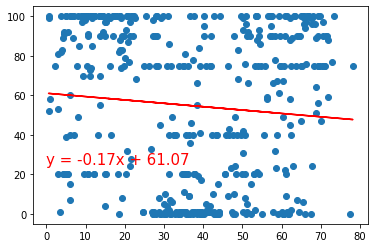

'y = -0.17x + 61.07'

In [21]:
#Latitude vs Cloudiness
#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Cloudiness(%)'])
north_humidity

The r-squared value is: 0.04


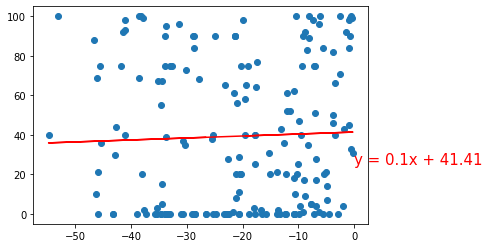

'y = 0.1x + 41.41'

In [22]:
#South
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Cloudiness(%)'])
south_humidity

The r-squared value is: 0.04


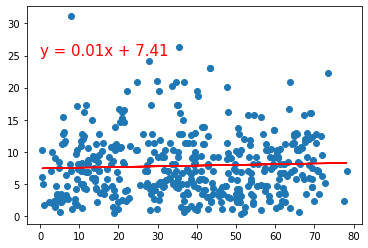

'y = 0.01x + 7.41'

In [23]:
#Latitude vs Wind Speed
#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Wind Speed(mph)'])
north_humidity

The r-squared value is: -0.33


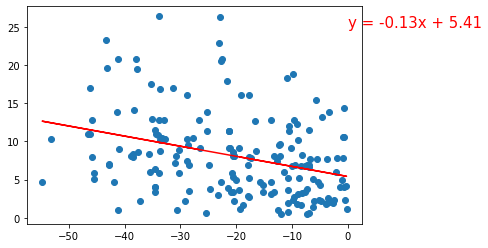

'y = -0.13x + 5.41'

In [24]:
#South
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Wind Speed(mph)'])
south_humidity